# Movie Rating Prediction

In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
try:
    df = pd.read_csv("C:\\MCA\\DataSets\\IMDb Movies India.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 doesn't work, try ISO-8859-1 (Latin-1) encoding
    df = pd.read_csv("C:\\MCA\\DataSets\\IMDb Movies India.csv", encoding='ISO-8859-1')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
df.shape

(15509, 10)

In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3'],inplace=True)

In [10]:
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

In [11]:
df.isna().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating      3528
Votes       3527
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [12]:
df.shape

(11086, 10)

In [13]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Calculate the mean of the "Votes" column
votes_mean = df['Votes'].mean()
votes_mean=int(votes_mean)

In [14]:
print(votes_mean)

125


In [15]:
df['Votes'].fillna(votes_mean,inplace=True)

In [16]:
rating_mean=df['Rating'].mean()
mean_rating=round(rating_mean,1)

In [17]:
print(mean_rating)

5.8


In [18]:
df['Rating'].fillna(mean_rating,inplace=True)

In [19]:
df.isna().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [20]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Calculate the mean of the "Duration" column
mean_duration = df['Duration'].mean()

In [21]:
print(mean_duration)

131.11078355314197


In [22]:
mean_of_duration=int(mean_duration)

In [23]:
print(mean_of_duration)

131


In [24]:
df['Duration'].fillna(mean_of_duration,inplace=True)

In [25]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [25]:
df.shape

(11086, 10)

In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",5.8,125.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,5.8,125.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [27]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15502,Zulm Ki Pukar,(1979),131.0,Action,5.8,125.0,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,(1998),130.0,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [28]:
df.describe()

,Duration,Rating,Votes
count,11086.000000,11086.000000,11086.000000
mean,131.064406,5.807586,125.392928
std,20.259440,1.129740,147.681810
min,21.000000,1.100000,5.000000
25%,129.000000,5.400000,31.000000
50%,131.000000,5.800000,125.000000
75%,137.000000,6.400000,125.000000
max,321.000000,10.000000,999.000000


In [29]:
df['Rating'].value_counts()

5.8     3726
6.2      259
6.8      251
6.5      246
6.6      223
        ... 
1.4        1
9.6        1
9.7        1
10.0       1
1.1        1
Name: Rating, Length: 84, dtype: int64

In [30]:
df['Genre'].value_counts()

Drama                         2116
Action                         991
Drama, Romance                 507
Romance                        504
Action, Crime, Drama           452
                              ... 
History, Romance                 1
Reality-TV                       1
Family, Drama, Thriller          1
Action, Musical, War             1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 448, dtype: int64

In [31]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [32]:
def convert_year(year_str):
    return int(year_str.strip('()'))

# Apply the conversion function to the 'Year' column
df['Year'] = df['Year'].apply(convert_year)

In [33]:
print(df['Year'])

1        2019
2        2021
3        2019
4        2010
5        1997
         ... 
15502    1979
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 11086, dtype: int64


In [34]:
#copy of the DataFrame
df_copy = df.copy()

# Store the original 'Rating' as a new column
df['OriginalRating'] = df['Rating']
print(df['OriginalRating'])

1        7.0
2        5.8
3        4.4
4        5.8
5        4.7
        ... 
15502    5.8
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: OriginalRating, Length: 11086, dtype: float64


In [35]:
#Convert 'Rating' column from float to integer
df['Rating'] = df['Rating'].astype(int)

In [36]:
df['Rating'].value_counts()

5     5265
6     2226
7     1299
4     1195
3      593
8      274
2      185
9       28
1       20
10       1
Name: Rating, dtype: int64

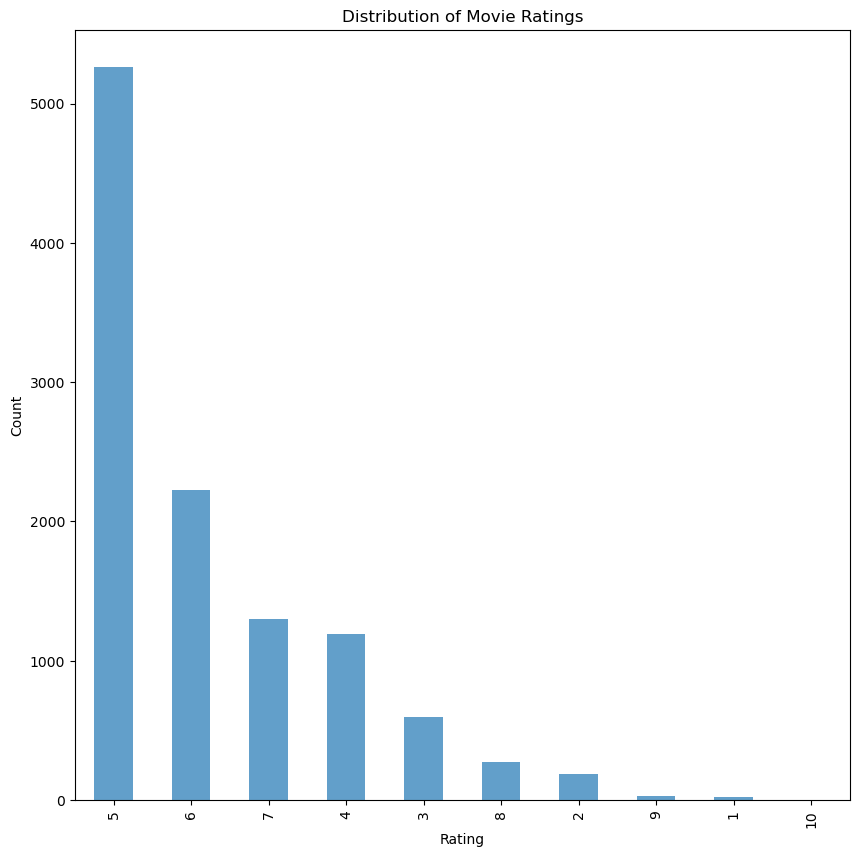

In [38]:
df['Rating'].value_counts().plot(kind='bar', alpha=0.7, figsize=(10, 10))

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')

# Show the plot
plt.show()

In [39]:
#use original 'Rating' column that we had copied
print(df['OriginalRating'])

1        7.0
2        5.8
3        4.4
4        5.8
5        4.7
        ... 
15502    5.8
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: OriginalRating, Length: 11086, dtype: float64


In [40]:
X=df[['Votes','Duration','Year']] #Feature
y=df['OriginalRating']  #Target Variable

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
print(X_train)
print(X_train.shape)

       Votes  Duration  Year
11410  178.0     129.0  1995
13937   22.0     120.0  1984
9294    53.0     131.0  1963
3893   125.0     131.0  2003
11083  125.0     131.0  2015
...      ...       ...   ...
7860   125.0     131.0  2000
7106    90.0     131.0  1973
7385    49.0     121.0  1991
1154    15.0     131.0  1978
10027    9.0     131.0  1952

[8868 rows x 3 columns]
(8868, 3)


In [43]:
print(X_test)

       Votes  Duration  Year
7432    33.0     131.0  1987
5779    33.0     147.0  1985
13982   60.0     135.0  1979
10669  125.0     131.0  1958
9387    14.0     105.0  2005
...      ...       ...   ...
15178  419.0     192.0  1992
11872  125.0     120.0  2002
2576   125.0     156.0  2015
15382    7.0     131.0  1939
674    783.0     145.0  1991

[2218 rows x 3 columns]


In [44]:
print(y_train)
print(y_train.shape)

11410    4.9
13937    6.1
9294     7.8
3893     5.8
11083    5.8
        ... 
7860     5.8
7106     6.0
7385     7.0
1154     6.5
10027    6.6
Name: OriginalRating, Length: 8868, dtype: float64
(8868,)


In [45]:
print(y_test)
print(y_test.shape)

7432     6.4
5779     4.7
13982    6.3
10669    5.8
9387     7.6
        ... 
15178    5.4
11872    5.8
2576     6.5
15382    6.3
674      5.9
Name: OriginalRating, Length: 2218, dtype: float64
(2218,)


In [46]:
model = XGBRegressor(n_estimators=100, random_state=42)

In [47]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
y_pred=model.predict(X_test)

In [49]:
print(y_pred)

[5.5510616 5.880005  6.6995845 ... 6.0074897 5.9381514 5.9016848]


In [50]:
print(y_test)

7432     6.4
5779     4.7
13982    6.3
10669    5.8
9387     7.6
        ... 
15178    5.4
11872    5.8
2576     6.5
15382    6.3
674      5.9
Name: OriginalRating, Length: 2218, dtype: float64


In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.0987500477572363
Root Mean Squared Error (RMSE): 1.0482127874421474
R-squared (R2) Score: 0.14922195683881168


In [53]:
# Determine maximum possible sample size based on the size of the test set
max_sample_size = len(X_test)

# Choose the desired sample size
sample_size = min(1000, max_sample_size)

# Randomly select sample indices from the test set
sample_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
sample_X_test = X_test.loc[sample_indices]

# Make predictions on the sample test set
sample_y_pred = model.predict(sample_X_test)

# Obtain the actual ratings for the selected sample using iloc with the correct indices
sample_y_test = y_test.iloc[X_test.index.isin(sample_X_test.index)]



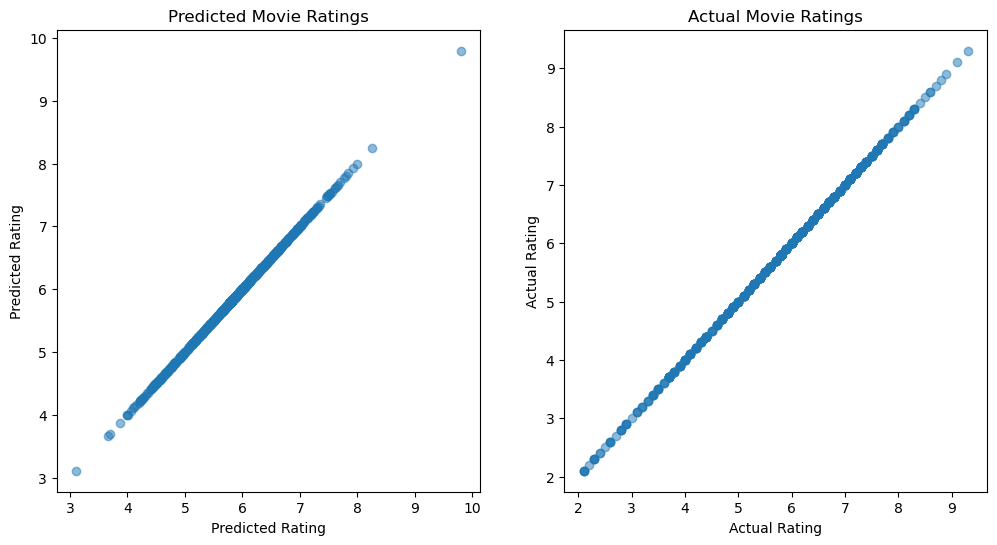

In [54]:
#scatter plot for predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(sample_y_pred, sample_y_pred, label='Predicted', alpha=0.5)
plt.xlabel("Predicted Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted Movie Ratings")

#scatter plot for actual values
plt.subplot(1, 2, 2)
plt.scatter(sample_y_test, sample_y_test, label='Actual', alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Actual Rating")
plt.title("Actual Movie Ratings")

plt.show()

